Name: Maharshi Hirenkumar Mehta
Lab-2
Student_Number = N01609977

In [1]:
#import importnt libraries 
import pandas as pd
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mahar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv(r"C:\Users\mahar\Downloads\tweets (2).csv")

In [3]:
# print head 
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,LOSER! https://t.co/p5imhMJqS1,05-18-2020 14:55:14,32295,135445,False,1262396333064892416
1,Twitter for iPhone,Most of the money raised by the RINO losers of...,05-05-2020 18:18:26,19706,82425,False,1257736426206031874
2,Twitter for iPhone,....because they don’t know how to win and the...,05-05-2020 04:46:34,12665,56868,False,1257532112233803782
3,Twitter for iPhone,....lost for Evan “McMuffin” McMullin (to me)....,05-05-2020 04:46:34,13855,62268,False,1257532114666508291
4,Twitter for iPhone,....get even for all of their many failures. Y...,05-05-2020 04:46:33,8122,33261,False,1257532110971318274


In [4]:
df.tail()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
256,Twitter Web Client,.@Cher attacked @MittRomney. She is an average...,05-10-2012 15:10:23,715,465,False,200603697435246592
257,Twitter Web Client,Firing @lisalampanelli may have come as a surp...,05-07-2012 02:58:18,45,19,False,199332301463748609
258,Twitter Web Client,My @SquawkCNBC interview discussing why @MittR...,03-06-2012 17:07:51,32,9,False,177078050750599168
259,TweetDeck,I feel sorry for Rosie 's new partner in love ...,12-14-2011 16:45:55,667,463,False,146994336670822400
260,TweetDeck,The S&P are losers. They did this for personal...,08-09-2011 17:40:33,209,19,False,100984825103663104


In [5]:
#print coloumns
df.columns

Index(['source', 'text', 'created_at', 'retweet_count', 'favorite_count',
       'is_retweet', 'id_str'],
      dtype='object')

In [6]:

# dding the additional stop words
ADDITIONAL_STOPWORDS = ['Maharshi']


In [7]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer() # WordNetLemmatizer() Lemmatizes the reducing words to their root form
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS # There are set of stopwords in the nltk library
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore') #Ignore the characters that cannot be in ASCII
    .decode('utf-8', 'ignore')
    .lower()) # Converts text to lowercase
  words = re.sub(r'[^\w\s]', '', text).split() #to remove all punctuations and then split the text into a list of words
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [8]:
words = basic_clean(''.join(str(df['text'].tolist())))


In [9]:
words[:33]

['loser',
 'httpstcop5imhmjqs1',
 'money',
 'raised',
 'rino',
 'loser',
 'socalled',
 'lincoln',
 'project',
 'go',
 'pocket',
 'ive',
 'done',
 'judge',
 'tax',
 'regulation',
 'healthcare',
 'military',
 'vet',
 'choice',
 'amp',
 'protecting',
 'great',
 '2a',
 'love',
 'trump',
 'problem',
 'beat',
 'dont',
 'know',
 'win',
 'socalled',
 'lincoln']

In [10]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:33]

(hater, loser)           42
(total, loser)           32
(loser, hater)           14
(amp, loser)             13
(donald, trump)          11
(hater, amp)             11
(separate, winner)        8
(winner, loser)           8
(twist, fate)             6
(wear, wig)               6
(loser, like)             6
(new, twist)              6
(reacts, new)             6
(person, reacts)          6
(loser, person)           6
(loser, happy)            6
(karl, rove)              5
(ill, show)               5
(ego, ill)                5
(show, loser)             5
(without, ego)            5
(biggest, loser)          5
(major, loser)            5
(would, never)            5
(fake, news)              5
(loser, amp)              5
(mini, mike)              5
(everyone, including)     5
(including, hater)        5
(waste, time)             4
(overrated, loser)        4
(many, great)             4
(jon, stewart)            4
dtype: int64

In [11]:
# trigram
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:33]

(hater, amp, loser)             10
(separate, winner, loser)        8
(loser, person, reacts)          6
(person, reacts, new)            6
(reacts, new, twist)             6
(new, twist, fate)               6
(winner, loser, person)          6
(hater, loser, happy)            6
(without, ego, ill)              5
(everyone, including, hater)     5
(including, hater, loser)        5
(ego, ill, show)                 5
(ill, show, loser)               5
(never, loser, quit)             4
(youre, never, loser)            4
(stone, cold, loser)             4
(loser, quit, trying)            4
(quit, trying, mike)             4
(trying, mike, ditka)            4
(someone, without, ego)          4
(even, hater, loser)             4
(show, someone, without)         4
(totally, overrated, loser)      3
(mccabe, peter, lover)           3
(wish, everyone, including)      3
(say, wear, wig)                 3
(twist, fate, donald)            3
(fate, donald, trump)            3
(think, hater, loser

In [12]:
# first 12 words in bigrams 
bigrams_series1 = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series1 = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

Text(0.5, 0, '# the  Occurance')

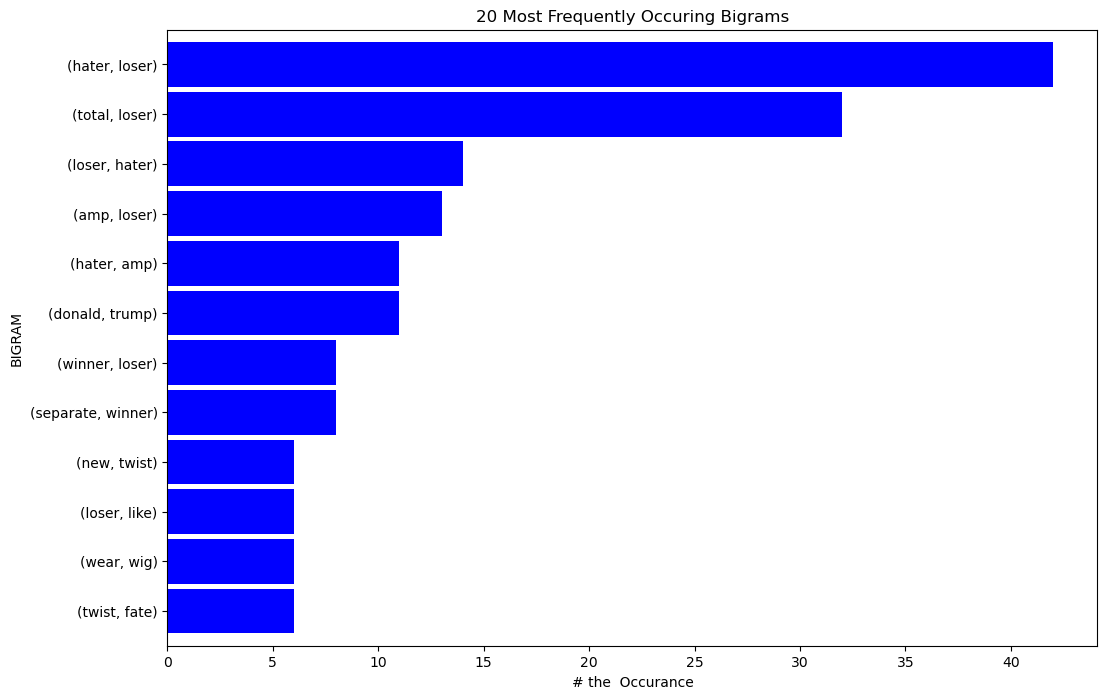

In [13]:
# 12 values and plot in bar graph
bigrams_series1.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('BIGRAM')
plt.xlabel('# the  Occurance')

Text(0.5, 0, ' occurence')

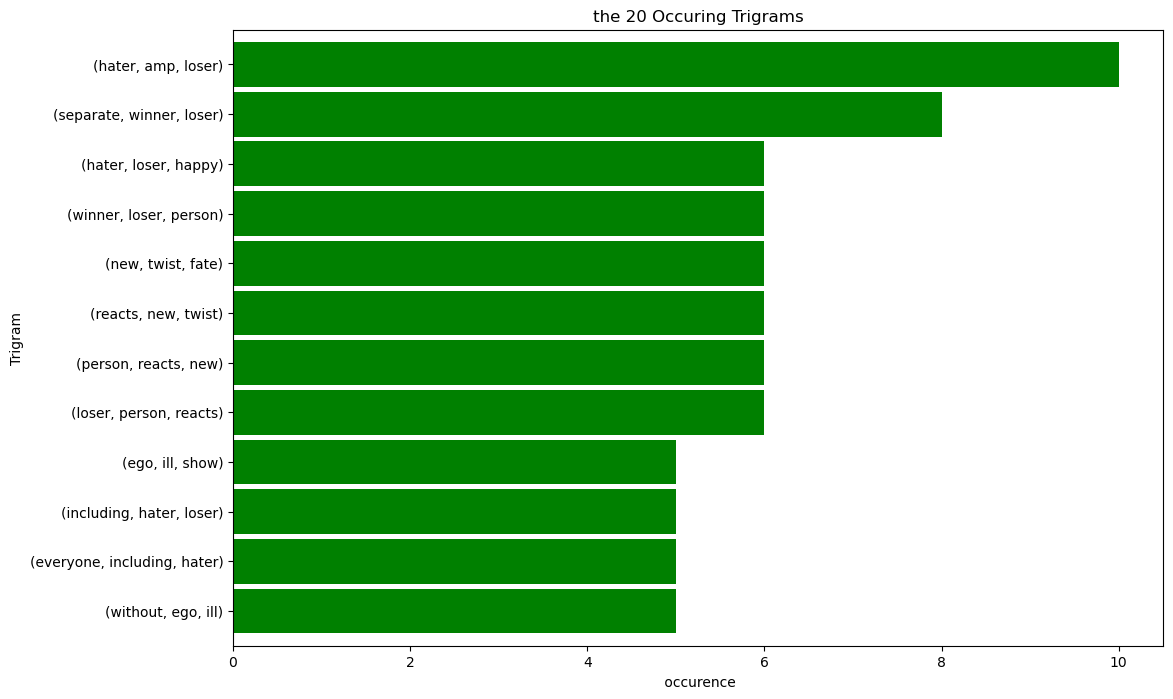

In [14]:
trigrams_series1.sort_values().plot.barh(color='green', width=.9, figsize=(12, 8))
plt.title('the 20 Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel(' occurence')